In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
multi_act = pd.read_csv("ATUS DATA 03-19/atus_activity_0319.dat", 
                        dtype= {"TRCODEP": object, "TRTIER1P": object, "TRTIER2P": object}) #using 2003-2019 activity file
#multi_act

In [307]:
multi_rost = pd.read_csv("ATUS DATA 03-19/atus_rost_0319.dat")

#TERRP = How is this person related to you?
# "There is no distinction between 18 and 19"
roster_list = [18,19] # 18 and 19 = self 
multi_rost = multi_rost[multi_rost["TERRP"].isin(roster_list)]
#multi_rost.head(20)

In [4]:
multi_resp = pd.read_csv("ATUS DATA 03-19/atus_resp_0319.dat")
#multi_resp.columns.to_list()

In [5]:
multi_merged1 = pd.merge(multi_act, multi_resp, on="TUCASEID")
multi_merged = pd.merge(multi_merged1, multi_rost, on="TUCASEID")
#multi_merged = pd.merge(multi_resp, multi_rost, on="TUCASEID")
multi_merged = multi_merged.filter(["TUCASEID","TUACTDUR24","TUCUMDUR","TRTIER1P","TRTIER2P","TRCODEP", 
                                    "TEWHERE","TEAGE", "TUFNWGTP","TUSTARTTIM","TUSTOPTIME", "TUYEAR"])
#multi_merged.head(20)

## Age Between 18 and 24  Population

In [6]:
#p18_24loyed_codes = [3,4] # 3= Age Between 18 and 24  - on layoff, 3 = Age Between 18 and 24  - looking
#multi_merged_p18_24loyed = multi_merged[multi_merged["TELFS"].isin(p18_24loyed_codes)]
#multi_merged_p18_24loyed["TELFS"].unique()

multi_merged_p18_24loyed = multi_merged[(multi_merged["TEAGE"] >= 18) & (multi_merged["TEAGE"] <= 24)]
multi_merged_p18_24loyed

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TEAGE,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
131,20030100014427,60,60,01,0101,010101,-1,21,6.574427e+06,04:00:00,05:00:00,2003
132,20030100014427,80,140,01,0102,010201,-1,21,6.574427e+06,05:00:00,06:20:00,2003
133,20030100014427,25,165,18,1805,180501,12,21,6.574427e+06,06:20:00,06:45:00,2003
134,20030100014427,10,175,05,0501,050101,2,21,6.574427e+06,06:45:00,06:55:00,2003
135,20030100014427,260,435,05,0501,050101,2,21,6.574427e+06,06:55:00,11:15:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
4118957,20191212190331,5,931,18,1813,181301,12,24,1.320052e+07,19:26:00,19:31:00,2019
4118958,20191212190331,120,1051,12,1203,120303,1,24,1.320052e+07,19:31:00,21:31:00,2019
4118959,20191212190331,60,1111,50,5001,500101,1,24,1.320052e+07,21:31:00,22:31:00,2019
4118960,20191212190331,120,1231,12,1203,120308,1,24,1.320052e+07,22:31:00,00:31:00,2019


In [7]:
p18_24_2003 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_p18_24_weight = p18_24_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_p18_24_weight = atus_2003_p18_24_weight["TUFNWGTP"].sum()
atus_2003_p18_24_weight

9825379092.958874

## 2003-2019 Residential - Age Between 18 and 24 

In [8]:
#only residential location from 2003-2019
residential_location = [-1,1,3]
atus_multi_yr_res_p18_24 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TEWHERE"].isin(residential_location)]
#atus_multi_yr_res_p18_24

In [9]:
#atus residential year seperation by p18_24loyed population 
atus_2003_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_res_p18_24 = atus_multi_yr_res_p18_24[atus_multi_yr_res_p18_24["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_res_p18_24.head(30)

### 2003 All Residential Activities - Age Between 18 and 24  Population

In [10]:
atus_2003_all_res_p18_24 = atus_2003_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2003_all_res_p18_24

,TUACTDUR24
TUCASEID,
20030100014427,855
20030101030074,670
20030101030082,1370
20030101030124,1428
20030101030168,1350
...,...
20031212032648,1415
20031212032664,1440
20031212032808,973


In [11]:
atus_2003_all_res_p18_24_merge = pd.merge(atus_2003_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2003_all_res_p18_24_merge

,TUCASEID,TUACTDUR24,TUFNWGTP
0,20030100014427,855,6.574427e+06
1,20030101030074,670,1.221143e+07
2,20030101030082,1370,2.394056e+06
3,20030101030124,1428,1.836971e+07
4,20030101030168,1350,4.100694e+06
...,...,...,...
1498,20031212032648,1415,3.534580e+06
1499,20031212032664,1440,2.946482e+06
1500,20031212032808,973,2.692090e+06
1501,20031212033329,795,9.872682e+06


In [12]:
atus_2003_all_res_p18_24_merge["Multiplied Weight"] = atus_2003_all_res_p18_24_merge["TUACTDUR24"] * atus_2003_all_res_p18_24_merge["TUFNWGTP"]
#atus_2003_all_res_p18_24_merge

In [13]:
atus_2003_all_res_p18_24_multiplied_weight = atus_2003_all_res_p18_24_merge["Multiplied Weight"].sum()
atus_2003_all_res_p18_24_multiplied_weight

9698753942868.656

In [14]:
p18_24_2003 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_p18_24_weight = p18_24_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_p18_24_weight = atus_2003_p18_24_weight["TUFNWGTP"].sum()
atus_2003_p18_24_weight

9825379092.958874

In [15]:
all_act_2003_res_p18_24_hpd = atus_2003_all_res_p18_24_multiplied_weight / atus_2003_p18_24_weight / 60
all_act_2003_res_p18_24_hpd

16.451874021191777

### 2004 All Residential Activities - Age Between 18 and 24  Population

In [16]:
atus_2004_all_res_p18_24 = atus_2004_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_res_p18_24

In [17]:
atus_2004_all_res_p18_24_merge = pd.merge(atus_2004_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2004_all_res_p18_24_merge["Multiplied Weight"] = atus_2004_all_res_p18_24_merge["TUACTDUR24"] * atus_2004_all_res_p18_24_merge["TUFNWGTP"]
#atus_2004_all_res_p18_24_merge

In [18]:
p18_24_2004 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2004")]
atus_2004_p18_24_weight = p18_24_2004.drop_duplicates(subset=["TUCASEID"])
atus_2004_p18_24_weight = atus_2004_p18_24_weight["TUFNWGTP"].sum()

atus_2004_all_res_p18_24_multiplied_weight = atus_2004_all_res_p18_24_merge["Multiplied Weight"].sum()

In [19]:
all_act_2004_res_p18_24_hpd = atus_2004_all_res_p18_24_multiplied_weight / atus_2004_p18_24_weight / 60
all_act_2004_res_p18_24_hpd

16.655371887204883

### 2005 All Residential Activities - Age Between 18 and 24  Population

In [20]:
atus_2005_all_res_p18_24 = atus_2005_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_res_p18_24

In [21]:
atus_2005_all_res_p18_24_merge = pd.merge(atus_2005_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2005_all_res_p18_24_merge["Multiplied Weight"] = atus_2005_all_res_p18_24_merge["TUACTDUR24"] * atus_2005_all_res_p18_24_merge["TUFNWGTP"]
#atus_2005_all_res_p18_24_merge

In [22]:
p18_24_2005 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2005")]
atus_2005_p18_24_weight = p18_24_2005.drop_duplicates(subset=["TUCASEID"])
atus_2005_p18_24_weight = atus_2005_p18_24_weight["TUFNWGTP"].sum()

atus_2005_all_res_p18_24_multiplied_weight = atus_2005_all_res_p18_24_merge["Multiplied Weight"].sum()

In [23]:
all_act_2005_res_p18_24_hpd = atus_2005_all_res_p18_24_multiplied_weight / atus_2005_p18_24_weight / 60
all_act_2005_res_p18_24_hpd

16.787790630695717

### 2006 All Residential Activities - Age Between 18 and 24  Population

In [24]:
atus_2006_all_res_p18_24 = atus_2006_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_res_p18_24

In [25]:
atus_2006_all_res_p18_24_merge = pd.merge(atus_2006_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2006_all_res_p18_24_merge["Multiplied Weight"] = atus_2006_all_res_p18_24_merge["TUACTDUR24"] * atus_2006_all_res_p18_24_merge["TUFNWGTP"]
#atus_2006_all_res_p18_24_merge

In [26]:
p18_24_2006 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2006")]
atus_2006_p18_24_weight = p18_24_2006.drop_duplicates(subset=["TUCASEID"])
atus_2006_p18_24_weight = atus_2006_p18_24_weight["TUFNWGTP"].sum()

atus_2006_all_res_p18_24_multiplied_weight = atus_2006_all_res_p18_24_merge["Multiplied Weight"].sum()

In [27]:
all_act_2006_res_p18_24_hpd = atus_2006_all_res_p18_24_multiplied_weight / atus_2006_p18_24_weight / 60
all_act_2006_res_p18_24_hpd

16.16793865876902

### 2007 All Residential Activities - Age Between 18 and 24  Population

In [28]:
atus_2007_all_res_p18_24 = atus_2007_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_res_p18_24

In [29]:
atus_2007_all_res_p18_24_merge = pd.merge(atus_2007_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2007_all_res_p18_24_merge["Multiplied Weight"] = atus_2007_all_res_p18_24_merge["TUACTDUR24"] * atus_2007_all_res_p18_24_merge["TUFNWGTP"]
#atus_2007_all_res_p18_24_merge

In [30]:
p18_24_2007 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2007")]
atus_2007_p18_24_weight = p18_24_2007.drop_duplicates(subset=["TUCASEID"])
atus_2007_p18_24_weight = atus_2007_p18_24_weight["TUFNWGTP"].sum()

atus_2007_all_res_p18_24_multiplied_weight = atus_2007_all_res_p18_24_merge["Multiplied Weight"].sum()

In [31]:
all_act_2007_res_p18_24_hpd = atus_2007_all_res_p18_24_multiplied_weight / atus_2007_p18_24_weight / 60
all_act_2007_res_p18_24_hpd

16.081000419950133

### 2008 All Residential Activities - Age Between 18 and 24  Population

In [32]:
atus_2008_all_res_p18_24 = atus_2008_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_res_p18_24

In [33]:
atus_2008_all_res_p18_24_merge = pd.merge(atus_2008_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2008_all_res_p18_24_merge["Multiplied Weight"] = atus_2008_all_res_p18_24_merge["TUACTDUR24"] * atus_2008_all_res_p18_24_merge["TUFNWGTP"]
#atus_2008_all_res_p18_24_merge

In [34]:
p18_24_2008 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2008")]
atus_2008_p18_24_weight = p18_24_2008.drop_duplicates(subset=["TUCASEID"])
atus_2008_p18_24_weight = atus_2008_p18_24_weight["TUFNWGTP"].sum()

atus_2008_all_res_p18_24_multiplied_weight = atus_2008_all_res_p18_24_merge["Multiplied Weight"].sum()

In [35]:
all_act_2008_res_p18_24_hpd = atus_2008_all_res_p18_24_multiplied_weight / atus_2008_p18_24_weight / 60
all_act_2008_res_p18_24_hpd

16.51997126874162

### 2009 All Residential Activities - Age Between 18 and 24  Population

In [36]:
atus_2009_all_res_p18_24 = atus_2009_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_res_p18_24

In [37]:
atus_2009_all_res_p18_24_merge = pd.merge(atus_2009_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2009_all_res_p18_24_merge["Multiplied Weight"] = atus_2009_all_res_p18_24_merge["TUACTDUR24"] * atus_2009_all_res_p18_24_merge["TUFNWGTP"]
#atus_2009_all_res_p18_24_merge

In [38]:
p18_24_2009 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2009")]
atus_2009_p18_24_weight = p18_24_2009.drop_duplicates(subset=["TUCASEID"])
atus_2009_p18_24_weight = atus_2009_p18_24_weight["TUFNWGTP"].sum()

atus_2009_all_res_p18_24_multiplied_weight = atus_2009_all_res_p18_24_merge["Multiplied Weight"].sum()

In [39]:
all_act_2009_res_p18_24_hpd = atus_2009_all_res_p18_24_multiplied_weight / atus_2009_p18_24_weight / 60
all_act_2009_res_p18_24_hpd

16.91281714194202

### 2010 All Residential Activities - Age Between 18 and 24  Population

In [40]:
atus_2010_all_res_p18_24 = atus_2010_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_res_p18_24

In [41]:
atus_2010_all_res_p18_24_merge = pd.merge(atus_2010_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2010_all_res_p18_24_merge["Multiplied Weight"] = atus_2010_all_res_p18_24_merge["TUACTDUR24"] * atus_2010_all_res_p18_24_merge["TUFNWGTP"]
#atus_2010_all_res_p18_24_merge

In [42]:
p18_24_2010 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2010")]
atus_2010_p18_24_weight = p18_24_2010.drop_duplicates(subset=["TUCASEID"])
atus_2010_p18_24_weight = atus_2010_p18_24_weight["TUFNWGTP"].sum()

atus_2010_all_res_p18_24_multiplied_weight = atus_2010_all_res_p18_24_merge["Multiplied Weight"].sum()

In [43]:
all_act_2010_res_p18_24_hpd = atus_2010_all_res_p18_24_multiplied_weight / atus_2010_p18_24_weight / 60
all_act_2010_res_p18_24_hpd

17.208172306931168

### 2011 All Residential Activities - Age Between 18 and 24  Population

In [44]:
atus_2011_all_res_p18_24 = atus_2011_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_res_p18_24

In [45]:
atus_2011_all_res_p18_24_merge = pd.merge(atus_2011_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_p18_24_merge["Multiplied Weight"] = atus_2011_all_res_p18_24_merge["TUACTDUR24"] * atus_2011_all_res_p18_24_merge["TUFNWGTP"]
#atus_2011_all_res_p18_24_merge

In [46]:
atus_2011_all_res_p18_24_merge = pd.merge(atus_2011_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_p18_24_merge["Multiplied Weight"] = atus_2011_all_res_p18_24_merge["TUACTDUR24"] * atus_2011_all_res_p18_24_merge["TUFNWGTP"]
#atus_2011_all_res_p18_24_merge

In [47]:
p18_24_2011 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2011")]
atus_2011_p18_24_weight = p18_24_2011.drop_duplicates(subset=["TUCASEID"])
atus_2011_p18_24_weight = atus_2011_p18_24_weight["TUFNWGTP"].sum()

atus_2011_all_res_p18_24_multiplied_weight = atus_2011_all_res_p18_24_merge["Multiplied Weight"].sum()

In [48]:
all_act_2011_res_p18_24_hpd = atus_2011_all_res_p18_24_multiplied_weight / atus_2011_p18_24_weight / 60
all_act_2011_res_p18_24_hpd

17.105612465669356

### 2012 All Residential Activities - Age Between 18 and 24  Population

In [49]:
atus_2012_all_res_p18_24 = atus_2012_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_res_p18_24

In [50]:
atus_2012_all_res_p18_24_merge = pd.merge(atus_2012_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_p18_24_merge["Multiplied Weight"] = atus_2012_all_res_p18_24_merge["TUACTDUR24"] * atus_2012_all_res_p18_24_merge["TUFNWGTP"]
#atus_2012_all_res_p18_24_merge

In [51]:
atus_2012_all_res_p18_24_merge = pd.merge(atus_2012_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_p18_24_merge["Multiplied Weight"] = atus_2012_all_res_p18_24_merge["TUACTDUR24"] * atus_2012_all_res_p18_24_merge["TUFNWGTP"]
#atus_2012_all_res_p18_24_merge

In [52]:
p18_24_2012 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2012")]
atus_2012_p18_24_weight = p18_24_2012.drop_duplicates(subset=["TUCASEID"])
atus_2012_p18_24_weight = atus_2012_p18_24_weight["TUFNWGTP"].sum()

atus_2012_all_res_p18_24_multiplied_weight = atus_2012_all_res_p18_24_merge["Multiplied Weight"].sum()

In [53]:
all_act_2012_res_p18_24_hpd = atus_2012_all_res_p18_24_multiplied_weight / atus_2012_p18_24_weight / 60
all_act_2012_res_p18_24_hpd

17.246259821956617

### 2013 All Residential Activities - Age Between 18 and 24  Population

In [54]:
atus_2013_all_res_p18_24 = atus_2013_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_res_p18_24

In [55]:
atus_2013_all_res_p18_24_merge = pd.merge(atus_2013_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_p18_24_merge["Multiplied Weight"] = atus_2013_all_res_p18_24_merge["TUACTDUR24"] * atus_2013_all_res_p18_24_merge["TUFNWGTP"]
#atus_2013_all_res_p18_24_merge

In [56]:
atus_2013_all_res_p18_24_merge = pd.merge(atus_2013_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_p18_24_merge["Multiplied Weight"] = atus_2013_all_res_p18_24_merge["TUACTDUR24"] * atus_2013_all_res_p18_24_merge["TUFNWGTP"]
#atus_2013_all_res_p18_24_merge

In [57]:
p18_24_2013 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2013")]
atus_2013_p18_24_weight = p18_24_2013.drop_duplicates(subset=["TUCASEID"])
atus_2013_p18_24_weight = atus_2013_p18_24_weight["TUFNWGTP"].sum()

atus_2013_all_res_p18_24_multiplied_weight = atus_2013_all_res_p18_24_merge["Multiplied Weight"].sum()

In [58]:
all_act_2013_res_p18_24_hpd = atus_2013_all_res_p18_24_multiplied_weight / atus_2013_p18_24_weight / 60
all_act_2013_res_p18_24_hpd

16.99522369782626

### 2014 All Residential Activities - Age Between 18 and 24  Population

In [59]:
atus_2014_all_res_p18_24 = atus_2014_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_res_p18_24

In [60]:
atus_2014_all_res_p18_24_merge = pd.merge(atus_2014_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_p18_24_merge["Multiplied Weight"] = atus_2014_all_res_p18_24_merge["TUACTDUR24"] * atus_2014_all_res_p18_24_merge["TUFNWGTP"]
#atus_2014_all_res_p18_24_merge

In [61]:
atus_2014_all_res_p18_24_merge = pd.merge(atus_2014_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_p18_24_merge["Multiplied Weight"] = atus_2014_all_res_p18_24_merge["TUACTDUR24"] * atus_2014_all_res_p18_24_merge["TUFNWGTP"]
#atus_2014_all_res_p18_24_merge

In [62]:
p18_24_2014 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2014")]
atus_2014_p18_24_weight = p18_24_2014.drop_duplicates(subset=["TUCASEID"])
atus_2014_p18_24_weight = atus_2014_p18_24_weight["TUFNWGTP"].sum()

atus_2014_all_res_p18_24_multiplied_weight = atus_2014_all_res_p18_24_merge["Multiplied Weight"].sum()

In [63]:
all_act_2014_res_p18_24_hpd = atus_2014_all_res_p18_24_multiplied_weight / atus_2014_p18_24_weight / 60
all_act_2014_res_p18_24_hpd

17.19725457585849

### 2015 All Residential Activities - Age Between 18 and 24  Population

In [64]:
atus_2015_all_res_p18_24 = atus_2015_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_res_p18_24

In [65]:
atus_2015_all_res_p18_24_merge = pd.merge(atus_2015_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_p18_24_merge["Multiplied Weight"] = atus_2015_all_res_p18_24_merge["TUACTDUR24"] * atus_2015_all_res_p18_24_merge["TUFNWGTP"]
#atus_2015_all_res_p18_24_merge

In [66]:
atus_2015_all_res_p18_24_merge = pd.merge(atus_2015_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_p18_24_merge["Multiplied Weight"] = atus_2015_all_res_p18_24_merge["TUACTDUR24"] * atus_2015_all_res_p18_24_merge["TUFNWGTP"]
#atus_2015_all_res_p18_24_merge

In [67]:
p18_24_2015 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2015")]
atus_2015_p18_24_weight = p18_24_2015.drop_duplicates(subset=["TUCASEID"])
atus_2015_p18_24_weight = atus_2015_p18_24_weight["TUFNWGTP"].sum()

atus_2015_all_res_p18_24_multiplied_weight = atus_2015_all_res_p18_24_merge["Multiplied Weight"].sum()

In [68]:
all_act_2015_res_p18_24_hpd = atus_2015_all_res_p18_24_multiplied_weight / atus_2015_p18_24_weight / 60
all_act_2015_res_p18_24_hpd

17.008304597889715

### 2016 All Residential Activities - Age Between 18 and 24  Population

In [69]:
atus_2016_all_res_p18_24 = atus_2016_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_res_p18_24

In [70]:
atus_2016_all_res_p18_24_merge = pd.merge(atus_2016_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_p18_24_merge["Multiplied Weight"] = atus_2016_all_res_p18_24_merge["TUACTDUR24"] * atus_2016_all_res_p18_24_merge["TUFNWGTP"]
#atus_2016_all_res_p18_24_merge

In [71]:
atus_2016_all_res_p18_24_merge = pd.merge(atus_2016_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_p18_24_merge["Multiplied Weight"] = atus_2016_all_res_p18_24_merge["TUACTDUR24"] * atus_2016_all_res_p18_24_merge["TUFNWGTP"]
#atus_2016_all_res_p18_24_merge

In [72]:
p18_24_2016 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2016")]
atus_2016_p18_24_weight = p18_24_2016.drop_duplicates(subset=["TUCASEID"])
atus_2016_p18_24_weight = atus_2016_p18_24_weight["TUFNWGTP"].sum()

atus_2016_all_res_p18_24_multiplied_weight = atus_2016_all_res_p18_24_merge["Multiplied Weight"].sum()

In [73]:
all_act_2016_res_p18_24_hpd = atus_2016_all_res_p18_24_multiplied_weight / atus_2016_p18_24_weight / 60
all_act_2016_res_p18_24_hpd

17.075190855344566

### 2017 All Residential Activities - Age Between 18 and 24  Population

In [74]:
atus_2017_all_res_p18_24 = atus_2017_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_res_p18_24

In [75]:
atus_2017_all_res_p18_24_merge = pd.merge(atus_2017_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_p18_24_merge["Multiplied Weight"] = atus_2017_all_res_p18_24_merge["TUACTDUR24"] * atus_2017_all_res_p18_24_merge["TUFNWGTP"]
#atus_2017_all_res_p18_24_merge

In [76]:
atus_2017_all_res_p18_24_merge = pd.merge(atus_2017_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_p18_24_merge["Multiplied Weight"] = atus_2017_all_res_p18_24_merge["TUACTDUR24"] * atus_2017_all_res_p18_24_merge["TUFNWGTP"]
#atus_2017_all_res_p18_24_merge

In [77]:
p18_24_2017 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2017")]
atus_2017_p18_24_weight = p18_24_2017.drop_duplicates(subset=["TUCASEID"])
atus_2017_p18_24_weight = atus_2017_p18_24_weight["TUFNWGTP"].sum()

atus_2017_all_res_p18_24_multiplied_weight = atus_2017_all_res_p18_24_merge["Multiplied Weight"].sum()

In [78]:
all_act_2017_res_p18_24_hpd = atus_2017_all_res_p18_24_multiplied_weight / atus_2017_p18_24_weight / 60
all_act_2017_res_p18_24_hpd

17.282487946826947

### 2018 All Residential Activities - Age Between 18 and 24  Population

In [79]:
atus_2018_all_res_p18_24 = atus_2018_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_res_p18_24

In [80]:
atus_2018_all_res_p18_24_merge = pd.merge(atus_2018_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_p18_24_merge["Multiplied Weight"] = atus_2018_all_res_p18_24_merge["TUACTDUR24"] * atus_2018_all_res_p18_24_merge["TUFNWGTP"]
#atus_2018_all_res_p18_24_merge

In [81]:
atus_2018_all_res_p18_24_merge = pd.merge(atus_2018_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_p18_24_merge["Multiplied Weight"] = atus_2018_all_res_p18_24_merge["TUACTDUR24"] * atus_2018_all_res_p18_24_merge["TUFNWGTP"]
#atus_2018_all_res_p18_24_merge

In [82]:
p18_24_2018 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2018")]
atus_2018_p18_24_weight = p18_24_2018.drop_duplicates(subset=["TUCASEID"])
atus_2018_p18_24_weight = atus_2018_p18_24_weight["TUFNWGTP"].sum()

atus_2018_all_res_p18_24_multiplied_weight = atus_2018_all_res_p18_24_merge["Multiplied Weight"].sum()

In [83]:
all_act_2018_res_p18_24_hpd = atus_2018_all_res_p18_24_multiplied_weight / atus_2018_p18_24_weight / 60
all_act_2018_res_p18_24_hpd

17.114779503925526

### 2019 All Residential Activities - Age Between 18 and 24  Population

In [84]:
atus_2019_all_res_p18_24 = atus_2019_res_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_res_p18_24

In [85]:
atus_2019_all_res_p18_24_merge = pd.merge(atus_2019_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_p18_24_merge["Multiplied Weight"] = atus_2019_all_res_p18_24_merge["TUACTDUR24"] * atus_2019_all_res_p18_24_merge["TUFNWGTP"]
#atus_2019_all_res_p18_24_merge

In [86]:
atus_2019_all_res_p18_24_merge = pd.merge(atus_2019_all_res_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_p18_24_merge["Multiplied Weight"] = atus_2019_all_res_p18_24_merge["TUACTDUR24"] * atus_2019_all_res_p18_24_merge["TUFNWGTP"]
#atus_2019_all_res_p18_24_merge

In [87]:
p18_24_2019 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TUCASEID"].apply(str).str.startswith("2019")]
atus_2019_p18_24_weight = p18_24_2019.drop_duplicates(subset=["TUCASEID"])
atus_2019_p18_24_weight = atus_2019_p18_24_weight["TUFNWGTP"].sum()

atus_2019_all_res_p18_24_multiplied_weight = atus_2019_all_res_p18_24_merge["Multiplied Weight"].sum()

In [88]:
all_act_2019_res_p18_24_hpd = atus_2019_all_res_p18_24_multiplied_weight / atus_2019_p18_24_weight / 60
all_act_2019_res_p18_24_hpd

16.98160327680245

### Regresssion: All Residential Activity - Age Between 18 and 24  

#### 2003 -2012 Regression 

In [89]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_p18_24_hpd, all_act_2004_res_p18_24_hpd, all_act_2005_res_p18_24_hpd,
                                   all_act_2006_res_p18_24_hpd, all_act_2007_res_p18_24_hpd, all_act_2008_res_p18_24_hpd,
                                   all_act_2009_res_p18_24_hpd, all_act_2010_res_p18_24_hpd, all_act_2011_res_p18_24_hpd,
                                   all_act_2012_res_p18_24_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

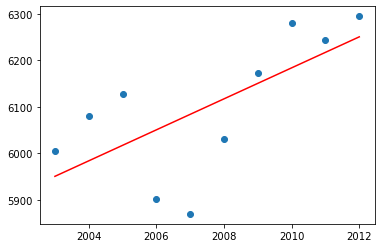

In [90]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [91]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.44887826894478666

In [92]:
all_act_2012_res_p18_24_slope = model.coef_
all_act_2012_res_p18_24_slope

array([[33.35142358]])

#### 2003-2019 Regression

In [93]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_p18_24_hpd, all_act_2004_res_p18_24_hpd, all_act_2005_res_p18_24_hpd,
                                   all_act_2006_res_p18_24_hpd, all_act_2007_res_p18_24_hpd, all_act_2008_res_p18_24_hpd,
                                   all_act_2009_res_p18_24_hpd, all_act_2010_res_p18_24_hpd, all_act_2011_res_p18_24_hpd,
                                   all_act_2012_res_p18_24_hpd, all_act_2013_res_p18_24_hpd, all_act_2014_res_p18_24_hpd,
                                   all_act_2015_res_p18_24_hpd, all_act_2016_res_p18_24_hpd, all_act_2017_res_p18_24_hpd,
                                   all_act_2018_res_p18_24_hpd, all_act_2019_res_p18_24_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

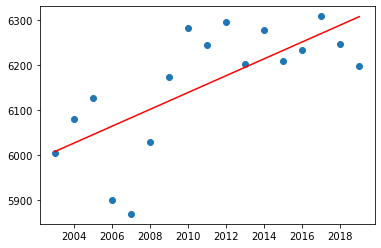

In [94]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [95]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.4855506765054305

In [96]:
all_act_2019_res_p18_24_slope = model.coef_
all_act_2019_res_p18_24_slope

array([[18.69918215]])

### 2003-2019 NonResidential - Age Between 18 and 24 

In [97]:
#non-residential = 2,4,5,6,7,8,9,10,11,30,31,32

In [98]:
nonresidential_location = [2,4,5,6,7,8,9,10,11,30,31,32]
atus_multi_yr_nonres_p18_24 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TEWHERE"].isin(nonresidential_location)]
#atus_multi_yr_res_p18_24

In [99]:
atus_2003_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_nonres_p18_24 = atus_multi_yr_nonres_p18_24[atus_multi_yr_nonres_p18_24["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_nonres_p18_24

### 2003 All Activities - NonResidential - Age Between 18 and 24 

In [100]:
atus_2003_all_nonres_p18_24 = atus_2003_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_nonres_p18_24

In [101]:
atus_2003_all_nonres_p18_24_merge = pd.merge(atus_2003_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_p18_24_merge

In [102]:
atus_2003_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2003_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2003_all_nonres_p18_24_merge["TUFNWGTP"]
#atus_2003_all_nonres_p18_24_merge

In [103]:
atus_2003_all_nonres_p18_24_multiplied_weight = atus_2003_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2003_all_nonres_p18_24_multiplied_weight

3564899432477.3857

In [104]:
all_act_2003_nonres_p18_24_hpd = atus_2003_all_nonres_p18_24_multiplied_weight / atus_2003_p18_24_weight / 60
all_act_2003_nonres_p18_24_hpd

6.047093957307776

### 2004 All Activities - NonResidential - Age Between 18 and 24 

In [105]:
atus_2004_all_nonres_p18_24 = atus_2004_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_nonres_p18_24

In [106]:
atus_2004_all_nonres_p18_24_merge = pd.merge(atus_2004_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_all_res_p18_24_merge

In [107]:
atus_2004_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2004_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2004_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2004_all_nonres_p18_24_multiplied_weight = atus_2004_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2004_all_nonres_p18_24_multiplied_weight

3510732935138.453

In [108]:
all_act_2004_nonres_p18_24_hpd = atus_2004_all_nonres_p18_24_multiplied_weight / atus_2004_p18_24_weight / 60
all_act_2004_nonres_p18_24_hpd

5.933767341266334

### 2005 All Activities - NonResidential - Age Between 18 and 24 

In [109]:
atus_2005_all_nonres_p18_24 = atus_2005_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_nonres_p18_24

In [110]:
atus_2005_all_nonres_p18_24_merge = pd.merge(atus_2005_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_all_res_p18_24_merge

In [111]:
atus_2005_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2005_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2005_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2005_all_nonres_p18_24_multiplied_weight = atus_2005_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2005_all_nonres_p18_24_multiplied_weight

3551468117105.9644

In [112]:
all_act_2005_nonres_p18_24_hpd = atus_2005_all_nonres_p18_24_multiplied_weight / atus_2005_p18_24_weight / 60
all_act_2005_nonres_p18_24_hpd

5.844293689925544

### 2006 All Activities - NonResidential - Age Between 18 and 24 

In [113]:
atus_2006_all_nonres_p18_24 = atus_2006_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_nonres_p18_24

In [114]:
atus_2006_all_nonres_p18_24_merge = pd.merge(atus_2006_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_all_res_p18_24_merge

In [115]:
atus_2006_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2006_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2006_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2006_all_nonres_p18_24_multiplied_weight = atus_2006_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2006_all_nonres_p18_24_multiplied_weight

3831090750967.5767

In [116]:
all_act_2006_nonres_p18_24_hpd = atus_2006_all_nonres_p18_24_multiplied_weight / atus_2006_p18_24_weight / 60
all_act_2006_nonres_p18_24_hpd

6.479783300330893

### 2007 All Activities - NonResidential - Age Between 18 and 24 

In [117]:
atus_2007_all_nonres_p18_24 = atus_2007_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_nonres_p18_24

In [118]:
atus_2007_all_nonres_p18_24_merge = pd.merge(atus_2007_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_all_res_p18_24_merge

In [119]:
atus_2007_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2007_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2007_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2007_all_nonres_p18_24_multiplied_weight = atus_2007_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2007_all_nonres_p18_24_multiplied_weight

3946007702656.459

In [120]:
all_act_2007_nonres_p18_24_hpd = atus_2007_all_nonres_p18_24_multiplied_weight / atus_2007_p18_24_weight / 60
all_act_2007_nonres_p18_24_hpd

6.576220818310399

### 2008 All Activities - NonResidential - Age Between 18 and 24 

In [121]:
atus_2008_all_nonres_p18_24 = atus_2008_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_nonres_p18_24

In [122]:
atus_2008_all_nonres_p18_24_merge = pd.merge(atus_2008_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_all_res_p18_24_merge

In [123]:
atus_2008_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2008_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2008_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2008_all_nonres_p18_24_multiplied_weight = atus_2008_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2008_all_nonres_p18_24_multiplied_weight

3659339220095.1763

In [124]:
all_act_2008_nonres_p18_24_hpd = atus_2008_all_nonres_p18_24_multiplied_weight / atus_2008_p18_24_weight / 60
all_act_2008_nonres_p18_24_hpd

6.164269386258201

### 2009 All Activities - NonResidential - Age Between 18 and 24 

In [125]:
atus_2009_all_nonres_p18_24 = atus_2009_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_nonres_p18_24

In [126]:
atus_2009_all_nonres_p18_24_merge = pd.merge(atus_2009_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_all_res_p18_24_merge

In [127]:
atus_2009_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2009_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2009_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2009_all_nonres_p18_24_multiplied_weight = atus_2009_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2009_all_nonres_p18_24_multiplied_weight

3455869770823.0425

In [128]:
all_act_2009_nonres_p18_24_hpd = atus_2009_all_nonres_p18_24_multiplied_weight / atus_2009_p18_24_weight / 60
all_act_2009_nonres_p18_24_hpd

5.748888014700939

### 2010 All Activities - NonResidential - Age Between 18 and 24 

In [129]:
atus_2010_all_nonres_p18_24 = atus_2010_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_nonres_p18_24

In [130]:
atus_2010_all_nonres_p18_24_merge = pd.merge(atus_2010_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_all_res_p18_24_merge

In [131]:
atus_2010_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2010_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2010_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2010_all_nonres_p18_24_multiplied_weight = atus_2010_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2010_all_nonres_p18_24_multiplied_weight

3452984524538.0117

In [132]:
all_act_2010_nonres_p18_24_hpd = atus_2010_all_nonres_p18_24_multiplied_weight / atus_2010_p18_24_weight / 60
all_act_2010_nonres_p18_24_hpd

5.582088623576394

### 2011 All Activities - NonResidential - Age Between 18 and 24 

In [133]:
atus_2011_all_nonres_p18_24 = atus_2011_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_nonres_p18_24

In [134]:
atus_2011_all_nonres_p18_24_merge = pd.merge(atus_2011_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_all_res_p18_24_merge

In [135]:
atus_2011_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2011_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2011_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2011_all_nonres_p18_24_multiplied_weight = atus_2011_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2011_all_nonres_p18_24_multiplied_weight

3649215288118.825

In [136]:
all_act_2011_nonres_p18_24_hpd = atus_2011_all_nonres_p18_24_multiplied_weight / atus_2011_p18_24_weight / 60
all_act_2011_nonres_p18_24_hpd

5.7113173156099615

### 2012 All Activities - NonResidential - Age Between 18 and 24 

In [137]:
atus_2012_all_nonres_p18_24 = atus_2012_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_nonres_p18_24

In [138]:
atus_2012_all_nonres_p18_24_merge = pd.merge(atus_2012_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_all_res_p18_24_merge

In [139]:
atus_2012_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2012_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2012_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2012_all_nonres_p18_24_multiplied_weight = atus_2012_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2012_all_nonres_p18_24_multiplied_weight

3466227383935.4795

In [140]:
all_act_2012_nonres_p18_24_hpd = atus_2012_all_nonres_p18_24_multiplied_weight / atus_2012_p18_24_weight / 60
all_act_2012_nonres_p18_24_hpd

5.447549117712131

### 2013 All Activities - NonResidential - Age Between 18 and 24 

In [141]:
atus_2013_all_nonres_p18_24 = atus_2013_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_nonres_p18_24

In [142]:
atus_2013_all_nonres_p18_24_merge = pd.merge(atus_2013_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_all_res_p18_24_merge

In [143]:
atus_2013_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2013_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2013_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2013_all_nonres_p18_24_multiplied_weight = atus_2013_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2013_all_nonres_p18_24_multiplied_weight

3698649346866.634

In [144]:
all_act_2013_nonres_p18_24_hpd = atus_2013_all_nonres_p18_24_multiplied_weight / atus_2013_p18_24_weight / 60
all_act_2013_nonres_p18_24_hpd

5.720176724481598

### 2014 All Activities - NonResidential - Age Between 18 and 24 

In [145]:
atus_2014_all_nonres_p18_24 = atus_2014_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_nonres_p18_24

In [146]:
atus_2014_all_nonres_p18_24_merge = pd.merge(atus_2014_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_all_res_p18_24_merge

In [147]:
atus_2014_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2014_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2014_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2014_all_nonres_p18_24_multiplied_weight = atus_2014_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2014_all_nonres_p18_24_multiplied_weight

3678524628345.0024

In [148]:
all_act_2014_nonres_p18_24_hpd = atus_2014_all_nonres_p18_24_multiplied_weight / atus_2014_p18_24_weight / 60
all_act_2014_nonres_p18_24_hpd

5.648500234878703

### 2015 All Activities - NonResidential - Age Between 18 and 24 

In [149]:
atus_2015_all_nonres_p18_24 = atus_2015_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_nonres_p18_24

In [150]:
atus_2015_all_nonres_p18_24_merge = pd.merge(atus_2015_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_all_res_p18_24_merge

In [151]:
atus_2015_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2015_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2015_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2015_all_nonres_p18_24_multiplied_weight = atus_2015_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2015_all_nonres_p18_24_multiplied_weight

3769197866118.259

In [152]:
all_act_2015_nonres_p18_24_hpd = atus_2015_all_nonres_p18_24_multiplied_weight / atus_2015_p18_24_weight / 60
all_act_2015_nonres_p18_24_hpd

5.8366009161868595

### 2016 All Activities - NonResidential - Age Between 18 and 24 

In [153]:
atus_2016_all_nonres_p18_24 = atus_2016_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_nonres_p18_24

In [154]:
atus_2016_all_nonres_p18_24_merge = pd.merge(atus_2016_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_all_res_p18_24_merge

In [155]:
atus_2016_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2016_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2016_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2016_all_nonres_p18_24_multiplied_weight = atus_2016_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2016_all_nonres_p18_24_multiplied_weight

3574733830047.0566

In [156]:
all_act_2016_nonres_p18_24_hpd = atus_2016_all_nonres_p18_24_multiplied_weight / atus_2016_p18_24_weight / 60
all_act_2016_nonres_p18_24_hpd

5.651624379284933

### 2017 All Activities - NonResidential - Age Between 18 and 24 

In [157]:
atus_2017_all_nonres_p18_24 = atus_2017_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_nonres_p18_24

In [158]:
atus_2017_all_nonres_p18_24_merge = pd.merge(atus_2017_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_all_res_p18_24_merge

In [159]:
atus_2017_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2017_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2017_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2017_all_nonres_p18_24_multiplied_weight = atus_2017_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2017_all_nonres_p18_24_multiplied_weight

3488299355780.3105

In [160]:
all_act_2017_nonres_p18_24_hpd = atus_2017_all_nonres_p18_24_multiplied_weight / atus_2017_p18_24_weight / 60
all_act_2017_nonres_p18_24_hpd

5.498630996593372

### 2018 All Activities - NonResidential - Age Between 18 and 24 

In [161]:
atus_2018_all_nonres_p18_24 = atus_2018_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_nonres_p18_24

In [162]:
atus_2018_all_nonres_p18_24_merge = pd.merge(atus_2018_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_all_res_p18_24_merge

In [163]:
atus_2018_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2018_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2018_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2018_all_nonres_p18_24_multiplied_weight = atus_2018_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2018_all_nonres_p18_24_multiplied_weight

3623221711988.8213

In [164]:
all_act_2018_nonres_p18_24_hpd = atus_2018_all_nonres_p18_24_multiplied_weight / atus_2018_p18_24_weight / 60
all_act_2018_nonres_p18_24_hpd

5.658153176384164

### 2019 All Activities - NonResidential - Age Between 18 and 24 

In [165]:
atus_2019_all_nonres_p18_24 = atus_2019_nonres_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_nonres_p18_24

In [166]:
atus_2019_all_nonres_p18_24_merge = pd.merge(atus_2019_all_nonres_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_all_res_p18_24_merge

In [167]:
atus_2019_all_nonres_p18_24_merge["Multiplied Weight"]=atus_2019_all_nonres_p18_24_merge["TUACTDUR24"]*atus_2019_all_nonres_p18_24_merge["TUFNWGTP"]

atus_2019_all_nonres_p18_24_multiplied_weight = atus_2019_all_nonres_p18_24_merge["Multiplied Weight"].sum()
atus_2019_all_nonres_p18_24_multiplied_weight

3554103202023.4883

In [168]:
all_act_2019_nonres_p18_24_hpd = atus_2019_all_nonres_p18_24_multiplied_weight / atus_2019_p18_24_weight / 60
all_act_2019_nonres_p18_24_hpd

5.757597447400608

### Regresssion: All Activities - NonResidential - Age Between 18 and 24 

#### 2003 -2012 Regression

In [169]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_p18_24_hpd, all_act_2004_nonres_p18_24_hpd, all_act_2005_nonres_p18_24_hpd,
                                   all_act_2006_nonres_p18_24_hpd, all_act_2007_nonres_p18_24_hpd, all_act_2008_nonres_p18_24_hpd,
                                   all_act_2009_nonres_p18_24_hpd, all_act_2010_nonres_p18_24_hpd, all_act_2011_nonres_p18_24_hpd,
                                   all_act_2012_nonres_p18_24_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

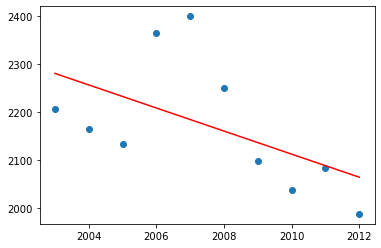

In [170]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [171]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.2922879426676278

In [172]:
all_act_2012_nonres_p18_24_slope = model.coef_
all_act_2012_nonres_p18_24_slope

array([[-24.042918]])

#### 2003 -2019 Regression

In [173]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_p18_24_hpd, all_act_2004_nonres_p18_24_hpd, all_act_2005_nonres_p18_24_hpd,
                                   all_act_2006_nonres_p18_24_hpd, all_act_2007_nonres_p18_24_hpd, all_act_2008_nonres_p18_24_hpd,
                                   all_act_2009_nonres_p18_24_hpd, all_act_2010_nonres_p18_24_hpd, all_act_2011_nonres_p18_24_hpd,
                                   all_act_2012_nonres_p18_24_hpd, all_act_2013_nonres_p18_24_hpd, all_act_2014_nonres_p18_24_hpd,
                                   all_act_2015_nonres_p18_24_hpd, all_act_2016_nonres_p18_24_hpd, all_act_2017_nonres_p18_24_hpd,
                                   all_act_2018_nonres_p18_24_hpd, all_act_2019_nonres_p18_24_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

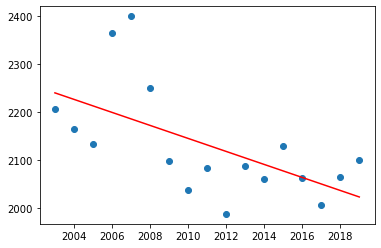

In [174]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [175]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.35273777139785123

In [176]:
all_act_2019_nonres_p18_24_slope = model.coef_
all_act_2019_nonres_p18_24_slope

array([[-13.56027885]])

## 2003-2019 Transportation - Age Between 18 and 24 

### 2003 Transportation

In [177]:
#transporation = 12, 13. 12 = Car, truck, or motorcycle (driver), 13= Car, truck, or motorcycle (passager)

In [178]:
transpoartion_location = [12,13]
atus_multi_yr_tran_p18_24 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TEWHERE"].isin(transpoartion_location)]
#atus_multi_yr_tran_p18_24

In [179]:
#atus transportation p18_24loyed population seperated by year
atus_2003_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_tran_p18_24 = atus_multi_yr_tran_p18_24[atus_multi_yr_tran_p18_24["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_tran_p18_24

In [180]:
atus_2003_tran_p18_24 = atus_2003_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_tran_p18_24

In [181]:
atus_2003_tran_p18_24_merge = pd.merge(atus_2003_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_tran_p18_24_merge

In [182]:
atus_2003_tran_p18_24_merge["Multiplied Weight"] = atus_2003_tran_p18_24_merge["TUACTDUR24"] * atus_2003_tran_p18_24_merge["TUFNWGTP"]
#atus_2003_tran_p18_24_merge

In [183]:
atus_2003_tran_p18_24_multiplied_weight = atus_2003_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2003_tran_p18_24_multiplied_weight

768866344490.3411

In [184]:
atus_2003_tran_p18_24_hpd = atus_2003_tran_p18_24_multiplied_weight / atus_2003_p18_24_weight / 60
atus_2003_tran_p18_24_hpd

1.3042182854829676

### 2004 Transportation

In [185]:
atus_2004_tran_p18_24 = atus_2004_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2004_tran_p18_24_merge = pd.merge(atus_2004_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_tran_p18_24_merge

In [186]:
atus_2004_tran_p18_24_merge["Multiplied Weight"] = atus_2004_tran_p18_24_merge["TUACTDUR24"] * atus_2004_tran_p18_24_merge["TUFNWGTP"]
atus_2004_tran_p18_24_multiplied_weight = atus_2004_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2004_tran_p18_24_multiplied_weight

711422918796.8995

In [187]:
atus_2004_tran_p18_24_hpd = atus_2004_tran_p18_24_multiplied_weight / atus_2004_p18_24_weight / 60
atus_2004_tran_p18_24_hpd

1.2024321300927816

### 2005 Transportation

In [188]:
atus_2005_tran_p18_24 = atus_2005_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2005_tran_p18_24_merge = pd.merge(atus_2005_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_tran_p18_24_merge

In [189]:
atus_2005_tran_p18_24_merge["Multiplied Weight"] = atus_2005_tran_p18_24_merge["TUACTDUR24"] * atus_2005_tran_p18_24_merge["TUFNWGTP"]
atus_2005_tran_p18_24_multiplied_weight = atus_2005_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2005_tran_p18_24_multiplied_weight

698370927281.5613

In [190]:
atus_2005_tran_p18_24_hpd = atus_2005_tran_p18_24_multiplied_weight / atus_2005_p18_24_weight / 60
atus_2005_tran_p18_24_hpd

1.1492387567497064

### 2006 Transportation

In [191]:
atus_2006_tran_p18_24 = atus_2006_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2006_tran_p18_24_merge = pd.merge(atus_2006_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_tran_p18_24_merge

In [192]:
atus_2006_tran_p18_24_merge["Multiplied Weight"] = atus_2006_tran_p18_24_merge["TUACTDUR24"] * atus_2006_tran_p18_24_merge["TUFNWGTP"]
atus_2006_tran_p18_24_multiplied_weight = atus_2006_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2006_tran_p18_24_multiplied_weight

686041437307.7454

In [193]:
atus_2006_tran_p18_24_hpd = atus_2006_tran_p18_24_multiplied_weight / atus_2006_p18_24_weight / 60
atus_2006_tran_p18_24_hpd

1.160348354493823

### 2007 Transportation

In [194]:
atus_2007_tran_p18_24 = atus_2007_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2007_tran_p18_24_merge = pd.merge(atus_2007_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_tran_p18_24_merge

In [195]:
atus_2007_tran_p18_24_merge["Multiplied Weight"] = atus_2007_tran_p18_24_merge["TUACTDUR24"] * atus_2007_tran_p18_24_merge["TUFNWGTP"]
atus_2007_tran_p18_24_multiplied_weight = atus_2007_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2007_tran_p18_24_multiplied_weight

680696828844.6843

In [196]:
atus_2007_tran_p18_24_hpd = atus_2007_tran_p18_24_multiplied_weight / atus_2007_p18_24_weight / 60
atus_2007_tran_p18_24_hpd

1.1344155901654107

### 2008 Transportation

In [197]:
atus_2008_tran_p18_24 = atus_2008_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2008_tran_p18_24_merge = pd.merge(atus_2008_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_tran_p18_24_merge

In [198]:
atus_2008_tran_p18_24_merge["Multiplied Weight"] = atus_2008_tran_p18_24_merge["TUACTDUR24"] * atus_2008_tran_p18_24_merge["TUFNWGTP"]
atus_2008_tran_p18_24_multiplied_weight = atus_2008_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2008_tran_p18_24_multiplied_weight

658746940131.8989

In [199]:
atus_2008_tran_p18_24_hpd = atus_2008_tran_p18_24_multiplied_weight / atus_2008_p18_24_weight / 60
atus_2008_tran_p18_24_hpd

1.1096794672784431

### 2009 Transportation

In [200]:
atus_2009_tran_p18_24 = atus_2009_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2009_tran_p18_24_merge = pd.merge(atus_2009_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_tran_p18_24_merge

In [201]:
atus_2009_tran_p18_24_merge["Multiplied Weight"] = atus_2009_tran_p18_24_merge["TUACTDUR24"] * atus_2009_tran_p18_24_merge["TUFNWGTP"]
atus_2009_tran_p18_24_multiplied_weight = atus_2009_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2009_tran_p18_24_multiplied_weight

697470227477.1593

In [202]:
atus_2009_tran_p18_24_hpd = atus_2009_tran_p18_24_multiplied_weight / atus_2009_p18_24_weight / 60
atus_2009_tran_p18_24_hpd

1.1602515422330983

### 2010 Transportation

In [203]:
atus_2010_tran_p18_24 = atus_2010_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2010_tran_p18_24_merge = pd.merge(atus_2010_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_tran_p18_24_merge

In [204]:
atus_2010_tran_p18_24_merge["Multiplied Weight"] = atus_2010_tran_p18_24_merge["TUACTDUR24"] * atus_2010_tran_p18_24_merge["TUFNWGTP"]
atus_2010_tran_p18_24_multiplied_weight = atus_2010_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2010_tran_p18_24_multiplied_weight

643693190212.7354

In [205]:
atus_2010_tran_p18_24_hpd = atus_2010_tran_p18_24_multiplied_weight / atus_2010_p18_24_weight / 60
atus_2010_tran_p18_24_hpd

1.040593263197682

### 2011 Transportation

In [206]:
atus_2011_tran_p18_24 = atus_2011_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2011_tran_p18_24_merge = pd.merge(atus_2011_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_tran_p18_24_merge

In [207]:
atus_2011_tran_p18_24_merge["Multiplied Weight"] = atus_2011_tran_p18_24_merge["TUACTDUR24"] * atus_2011_tran_p18_24_merge["TUFNWGTP"]
atus_2011_tran_p18_24_multiplied_weight = atus_2011_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2011_tran_p18_24_multiplied_weight

621419349380.4226

In [208]:
atus_2011_tran_p18_24_hpd = atus_2011_tran_p18_24_multiplied_weight / atus_2011_p18_24_weight / 60
atus_2011_tran_p18_24_hpd

0.9725715832460685

### 2012 Transportation

In [209]:
atus_2012_tran_p18_24 = atus_2012_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2012_tran_p18_24_merge = pd.merge(atus_2012_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_tran_p18_24_merge

In [210]:
atus_2012_tran_p18_24_merge["Multiplied Weight"] = atus_2012_tran_p18_24_merge["TUACTDUR24"] * atus_2012_tran_p18_24_merge["TUFNWGTP"]
atus_2012_tran_p18_24_multiplied_weight = atus_2012_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2012_tran_p18_24_multiplied_weight

714077004989.4373

In [211]:
atus_2012_tran_p18_24_hpd = atus_2012_tran_p18_24_multiplied_weight / atus_2012_p18_24_weight / 60
atus_2012_tran_p18_24_hpd

1.1222488104897905

### 2013 Transportation

In [212]:
atus_2013_tran_p18_24 = atus_2013_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2013_tran_p18_24_merge = pd.merge(atus_2013_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_tran_p18_24_merge

In [213]:
atus_2013_tran_p18_24_merge["Multiplied Weight"] = atus_2013_tran_p18_24_merge["TUACTDUR24"] * atus_2013_tran_p18_24_merge["TUFNWGTP"]
atus_2013_tran_p18_24_multiplied_weight = atus_2013_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2013_tran_p18_24_multiplied_weight

696192827120.7576

In [214]:
atus_2013_tran_p18_24_hpd = atus_2013_tran_p18_24_multiplied_weight / atus_2013_p18_24_weight / 60
atus_2013_tran_p18_24_hpd

1.0767027722757505

### 2014 Transportation

In [215]:
atus_2014_tran_p18_24 = atus_2014_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2014_tran_p18_24_merge = pd.merge(atus_2014_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_tran_p18_24_merge

In [216]:
atus_2014_tran_p18_24_merge["Multiplied Weight"] = atus_2014_tran_p18_24_merge["TUACTDUR24"] * atus_2014_tran_p18_24_merge["TUFNWGTP"]
atus_2014_tran_p18_24_multiplied_weight = atus_2014_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2014_tran_p18_24_multiplied_weight

649540600851.2095

In [217]:
atus_2014_tran_p18_24_hpd = atus_2014_tran_p18_24_multiplied_weight / atus_2014_p18_24_weight / 60
atus_2014_tran_p18_24_hpd

0.9973917826185634

### 2015 Transportation

In [218]:
atus_2015_tran_p18_24 = atus_2015_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2015_tran_p18_24_merge = pd.merge(atus_2015_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_tran_p18_24_merge

In [219]:
atus_2015_tran_p18_24_merge["Multiplied Weight"] = atus_2015_tran_p18_24_merge["TUACTDUR24"] * atus_2015_tran_p18_24_merge["TUFNWGTP"]
atus_2015_tran_p18_24_multiplied_weight = atus_2015_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2015_tran_p18_24_multiplied_weight

631022680937.2367

In [220]:
atus_2015_tran_p18_24_hpd = atus_2015_tran_p18_24_multiplied_weight / atus_2015_p18_24_weight / 60
atus_2015_tran_p18_24_hpd

0.9771382900325055

### 2016 Transportation

In [221]:
atus_2016_tran_p18_24 = atus_2016_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2016_tran_p18_24_merge = pd.merge(atus_2016_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_tran_p18_24_merge

In [222]:
atus_2016_tran_p18_24_merge["Multiplied Weight"] = atus_2016_tran_p18_24_merge["TUACTDUR24"] * atus_2016_tran_p18_24_merge["TUFNWGTP"]
atus_2016_tran_p18_24_multiplied_weight = atus_2016_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2016_tran_p18_24_multiplied_weight

671767513726.1469

In [223]:
atus_2016_tran_p18_24_hpd = atus_2016_tran_p18_24_multiplied_weight / atus_2016_p18_24_weight / 60
atus_2016_tran_p18_24_hpd

1.0620588380244076

### 2017 Transportation

In [224]:
atus_2017_tran_p18_24 = atus_2017_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2017_tran_p18_24_merge = pd.merge(atus_2017_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_tran_p18_24_merge

In [225]:
atus_2017_tran_p18_24_merge["Multiplied Weight"] = atus_2017_tran_p18_24_merge["TUACTDUR24"] * atus_2017_tran_p18_24_merge["TUFNWGTP"]
atus_2017_tran_p18_24_multiplied_weight = atus_2017_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2017_tran_p18_24_multiplied_weight

657921033133.7007

In [226]:
atus_2017_tran_p18_24_hpd = atus_2017_tran_p18_24_multiplied_weight / atus_2017_p18_24_weight / 60
atus_2017_tran_p18_24_hpd

1.0370855873091924

### 2018 Transportation

In [227]:
atus_2018_tran_p18_24 = atus_2018_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2018_tran_p18_24_merge = pd.merge(atus_2018_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_tran_p18_24_merge

In [228]:
atus_2018_tran_p18_24_merge["Multiplied Weight"] = atus_2018_tran_p18_24_merge["TUACTDUR24"] * atus_2018_tran_p18_24_merge["TUFNWGTP"]
atus_2018_tran_p18_24_multiplied_weight = atus_2018_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2018_tran_p18_24_multiplied_weight

694635712215.427

In [229]:
atus_2018_tran_p18_24_hpd = atus_2018_tran_p18_24_multiplied_weight / atus_2018_p18_24_weight / 60
atus_2018_tran_p18_24_hpd

1.0847680804341904

### 2019 Transportation

In [230]:
atus_2019_tran_p18_24 = atus_2019_tran_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2019_tran_p18_24_merge = pd.merge(atus_2019_tran_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_tran_p18_24_merge

In [231]:
atus_2019_tran_p18_24_merge["Multiplied Weight"] = atus_2019_tran_p18_24_merge["TUACTDUR24"] * atus_2019_tran_p18_24_merge["TUFNWGTP"]
atus_2019_tran_p18_24_multiplied_weight = atus_2019_tran_p18_24_merge["Multiplied Weight"].sum()
atus_2019_tran_p18_24_multiplied_weight

644415802673.9042

In [232]:
atus_2019_tran_p18_24_hpd = atus_2019_tran_p18_24_multiplied_weight / atus_2019_p18_24_weight / 60
atus_2019_tran_p18_24_hpd

1.0439445816957353

### Regresssion: Transportation - Age Between 18 and 24 

#### 2003 -2012 Regression

In [233]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_p18_24_hpd, atus_2004_tran_p18_24_hpd, atus_2005_tran_p18_24_hpd,
                                   atus_2006_tran_p18_24_hpd, atus_2007_tran_p18_24_hpd, atus_2008_tran_p18_24_hpd,
                                   atus_2009_tran_p18_24_hpd, atus_2010_tran_p18_24_hpd, atus_2011_tran_p18_24_hpd,
                                   atus_2012_tran_p18_24_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

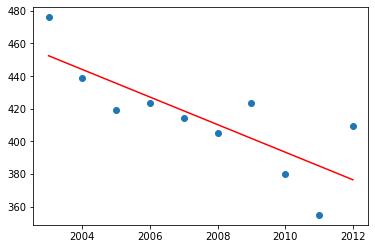

In [234]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [235]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.6232787491711638

In [236]:
tran_2012_p18_24_slope = model.coef_
tran_2012_p18_24_slope

array([[-8.43924935]])

#### 2003 -2019 Regression

In [237]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_p18_24_hpd, atus_2004_tran_p18_24_hpd, atus_2005_tran_p18_24_hpd,
                                   atus_2006_tran_p18_24_hpd, atus_2007_tran_p18_24_hpd, atus_2008_tran_p18_24_hpd,
                                   atus_2009_tran_p18_24_hpd, atus_2010_tran_p18_24_hpd, atus_2011_tran_p18_24_hpd,
                                   atus_2012_tran_p18_24_hpd, atus_2013_tran_p18_24_hpd, atus_2014_tran_p18_24_hpd,
                                   atus_2015_tran_p18_24_hpd, atus_2016_tran_p18_24_hpd, atus_2017_tran_p18_24_hpd,
                                   atus_2018_tran_p18_24_hpd, atus_2019_tran_p18_24_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

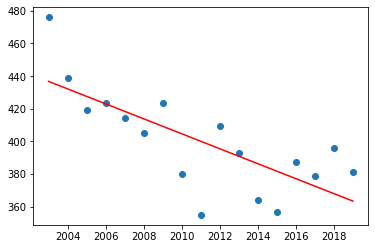

In [238]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [239]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.5442690447208953

In [240]:
tran_2019_p18_24_slope = model.coef_
tran_2019_p18_24_slope

array([[-4.58184037]])

### 2003-2019 - Unspecified- Age Between 18 and 24 

In [241]:
#unspecified = 89, 89 = Unspecified place

In [242]:
unspecified_location = [89]
atus_multi_yr_unsp_p18_24 = multi_merged_p18_24loyed[multi_merged_p18_24loyed["TEWHERE"].isin(unspecified_location)]
atus_multi_yr_unsp_p18_24

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TEAGE,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
1944,20030101031604,1,1122,04,0405,040507,89,24,2.249413e+06,22:41:00,22:42:00,2003
5543,20030111020795,1,1026,04,0401,040112,89,19,5.846569e+06,21:05:00,21:06:00,2003
6914,20030111021664,5,1036,04,0405,040507,89,18,1.720062e+06,21:11:00,21:16:00,2003
6922,20030111021664,2,1282,04,0405,040507,89,18,1.720062e+06,01:20:00,01:22:00,2003
8804,20030111022667,1,485,04,0405,040507,89,22,2.903227e+06,12:04:00,12:05:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
4040485,20190706191372,3,278,04,0405,040507,89,18,3.062553e+07,08:35:00,08:38:00,2019
4040493,20190706191372,10,620,04,0405,040508,89,18,3.062553e+07,14:10:00,14:20:00,2019
4040495,20190706191372,15,645,04,0405,040508,89,18,3.062553e+07,14:30:00,14:45:00,2019
4042095,20190706191701,5,925,04,0405,040507,89,18,1.491221e+07,19:20:00,19:25:00,2019


In [243]:
#atus transportation p18_24loyed population seperated by year
#unsp = unspecified
atus_2003_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_unsp_p18_24 = atus_multi_yr_unsp_p18_24[atus_multi_yr_unsp_p18_24["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_unsp_p18_24
#atus_2004_unsp_p18_24["TRCODEP"]

### 2003 Unspecified- Age Between 18 and 24 

In [244]:
atus_2003_unsp_p18_24 = atus_2003_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24",])
#atus_2003_unsp_p18_24

In [245]:
atus_2003_unsp_p18_24_merge = pd.merge(atus_2003_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_unsp_p18_24_merge

In [246]:
atus_2003_unsp_p18_24_merge["Multiplied Weight"] = atus_2003_unsp_p18_24_merge["TUACTDUR24"] * atus_2003_unsp_p18_24_merge["TUFNWGTP"]
#atus_2003_unsp_p18_24_merge

In [247]:
atus_2003_unsp_p18_24_multiplied_weight = atus_2003_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2003_unsp_p18_24_multiplied_weight

8754931806.724504

In [248]:
atus_2003_unsp_p18_24_hpd = atus_2003_unsp_p18_24_multiplied_weight / atus_2003_p18_24_weight / 60
atus_2003_unsp_p18_24_hpd

0.01485088043235319

### 2004 Unspecified- Age Between 18 and 24 

In [249]:
atus_2004_unsp_p18_24 = atus_2004_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_unsp_p18_24

In [250]:
atus_2004_unsp_p18_24_merge = pd.merge(atus_2004_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2004_unsp_p18_24_merge["Multiplied Weight"] = atus_2004_unsp_p18_24_merge["TUACTDUR24"] * atus_2004_unsp_p18_24_merge["TUFNWGTP"]

atus_2004_unsp_p18_24_multiplied_weight = atus_2004_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2004_unsp_p18_24_multiplied_weight

1837187232.096007

In [251]:
atus_2004_unsp_p18_24_hpd = atus_2004_unsp_p18_24_multiplied_weight / atus_2004_p18_24_weight / 60
atus_2004_unsp_p18_24_hpd

0.003105175414652513

### 2005 Unspecified- Age Between 18 and 24 

In [252]:
atus_2005_unsp_p18_24 = atus_2005_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_unsp_p18_24

In [253]:
atus_2005_unsp_p18_24_merge = pd.merge(atus_2005_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2005_unsp_p18_24_merge["Multiplied Weight"] = atus_2005_unsp_p18_24_merge["TUACTDUR24"] * atus_2005_unsp_p18_24_merge["TUFNWGTP"]

atus_2005_unsp_p18_24_multiplied_weight = atus_2005_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2005_unsp_p18_24_multiplied_weight

4698185249.6647215

In [254]:
atus_2005_unsp_p18_24_hpd = atus_2005_unsp_p18_24_multiplied_weight / atus_2005_p18_24_weight / 60
atus_2005_unsp_p18_24_hpd

0.007731330678843751

### 2006 Unspecified- Age Between 18 and 24 

In [255]:
atus_2006_unsp_p18_24 = atus_2006_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_unsp_p18_24

In [256]:
atus_2006_unsp_p18_24_merge = pd.merge(atus_2006_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2006_unsp_p18_24_merge["Multiplied Weight"] = atus_2006_unsp_p18_24_merge["TUACTDUR24"] * atus_2006_unsp_p18_24_merge["TUFNWGTP"]

atus_2006_unsp_p18_24_multiplied_weight = atus_2006_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2006_unsp_p18_24_multiplied_weight

6739299317.302964

In [257]:
atus_2006_unsp_p18_24_hpd = atus_2006_unsp_p18_24_multiplied_weight / atus_2006_p18_24_weight / 60
atus_2006_unsp_p18_24_hpd

0.011398633446926853

### 2007 Unspecified- Age Between 18 and 24 

In [258]:
atus_2007_unsp_p18_24 = atus_2007_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_unsp_p18_24

In [259]:
atus_2007_unsp_p18_24_merge = pd.merge(atus_2007_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2007_unsp_p18_24_merge["Multiplied Weight"] = atus_2007_unsp_p18_24_merge["TUACTDUR24"] * atus_2007_unsp_p18_24_merge["TUFNWGTP"]

atus_2007_unsp_p18_24_multiplied_weight = atus_2007_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2007_unsp_p18_24_multiplied_weight

8368023800.504999

In [260]:
atus_2007_unsp_p18_24_hpd = atus_2007_unsp_p18_24_multiplied_weight / atus_2007_p18_24_weight / 60
atus_2007_unsp_p18_24_hpd

0.0139457336304619

### 2008 Unspecified- Age Between 18 and 24 

In [261]:
atus_2008_unsp_p18_24 = atus_2008_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_unsp_p18_24

In [262]:
atus_2008_unsp_p18_24_merge = pd.merge(atus_2008_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2008_unsp_p18_24_merge["Multiplied Weight"] = atus_2008_unsp_p18_24_merge["TUACTDUR24"] * atus_2008_unsp_p18_24_merge["TUFNWGTP"]

atus_2008_unsp_p18_24_multiplied_weight = atus_2008_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2008_unsp_p18_24_multiplied_weight

10379792618.634289

In [263]:
atus_2008_unsp_p18_24_hpd = atus_2008_unsp_p18_24_multiplied_weight / atus_2008_p18_24_weight / 60
atus_2008_unsp_p18_24_hpd

0.017485079689630968

### 2009 Unspecified- Age Between 18 and 24 

In [264]:
atus_2009_unsp_p18_24 = atus_2009_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_unsp_p18_24

In [265]:
atus_2009_unsp_p18_24_merge = pd.merge(atus_2009_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2009_unsp_p18_24_merge["Multiplied Weight"] = atus_2009_unsp_p18_24_merge["TUACTDUR24"] * atus_2009_unsp_p18_24_merge["TUFNWGTP"]

atus_2009_unsp_p18_24_multiplied_weight = atus_2009_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2009_unsp_p18_24_multiplied_weight

4671517748.092165

In [266]:
atus_2009_unsp_p18_24_hpd = atus_2009_unsp_p18_24_multiplied_weight / atus_2009_p18_24_weight / 60
atus_2009_unsp_p18_24_hpd

0.007771135538499703

### 2010 Unspecified- Age Between 18 and 24 

In [267]:
atus_2010_unsp_p18_24 = atus_2010_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_unsp_p18_24

In [268]:
atus_2010_unsp_p18_24_merge = pd.merge(atus_2010_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2010_unsp_p18_24_merge["Multiplied Weight"] = atus_2010_unsp_p18_24_merge["TUACTDUR24"] * atus_2010_unsp_p18_24_merge["TUFNWGTP"]

atus_2010_unsp_p18_24_multiplied_weight = atus_2010_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2010_unsp_p18_24_multiplied_weight

4951305277.046246

In [269]:
atus_2010_unsp_p18_24_hpd = atus_2010_unsp_p18_24_multiplied_weight / atus_2010_p18_24_weight / 60
atus_2010_unsp_p18_24_hpd

0.00800427127965524

### 2011 Unspecified- Age Between 18 and 24 

In [270]:
atus_2011_unsp_p18_24 = atus_2011_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_unsp_p18_24

In [271]:
atus_2011_unsp_p18_24_merge = pd.merge(atus_2011_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2011_unsp_p18_24_merge["Multiplied Weight"] = atus_2011_unsp_p18_24_merge["TUACTDUR24"] * atus_2011_unsp_p18_24_merge["TUFNWGTP"]

atus_2011_unsp_p18_24_multiplied_weight = atus_2011_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2011_unsp_p18_24_multiplied_weight

7560649999.14202

In [272]:
atus_2011_unsp_p18_24_hpd = atus_2011_unsp_p18_24_multiplied_weight / atus_2011_p18_24_weight / 60
atus_2011_unsp_p18_24_hpd

0.011833029253701896

### 2012 Unspecified- Age Between 18 and 24 

In [273]:
atus_2012_unsp_p18_24 = atus_2012_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_unsp_p18_24

In [274]:
atus_2012_unsp_p18_24_merge = pd.merge(atus_2012_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2012_unsp_p18_24_merge["Multiplied Weight"] = atus_2012_unsp_p18_24_merge["TUACTDUR24"] * atus_2012_unsp_p18_24_merge["TUFNWGTP"]

atus_2012_unsp_p18_24_multiplied_weight = atus_2012_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2012_unsp_p18_24_multiplied_weight

7907871737.278778

In [275]:
atus_2012_unsp_p18_24_hpd = atus_2012_unsp_p18_24_multiplied_weight / atus_2012_p18_24_weight / 60
atus_2012_unsp_p18_24_hpd

0.012428070906439869

### 2013 Unspecified- Age Between 18 and 24 

In [276]:
atus_2013_unsp_p18_24 = atus_2013_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_unsp_p18_24

In [277]:
atus_2013_unsp_p18_24_merge = pd.merge(atus_2013_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2013_unsp_p18_24_merge["Multiplied Weight"] = atus_2013_unsp_p18_24_merge["TUACTDUR24"] * atus_2013_unsp_p18_24_merge["TUFNWGTP"]

atus_2013_unsp_p18_24_multiplied_weight = atus_2013_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2013_unsp_p18_24_multiplied_weight

4550150380.817172

In [278]:
atus_2013_unsp_p18_24_hpd = atus_2013_unsp_p18_24_multiplied_weight / atus_2013_p18_24_weight / 60
atus_2013_unsp_p18_24_hpd

0.007037072687977624

### 2014 Unspecified- Age Between 18 and 24 

In [279]:
atus_2014_unsp_p18_24 = atus_2014_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_unsp_p18_24

In [280]:
atus_2014_unsp_p18_24_merge = pd.merge(atus_2014_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2014_unsp_p18_24_merge["Multiplied Weight"] = atus_2014_unsp_p18_24_merge["TUACTDUR24"] * atus_2014_unsp_p18_24_merge["TUFNWGTP"]

atus_2014_unsp_p18_24_multiplied_weight = atus_2014_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2014_unsp_p18_24_multiplied_weight

6151307267.567117

In [281]:
atus_2014_unsp_p18_24_hpd = atus_2014_unsp_p18_24_multiplied_weight / atus_2014_p18_24_weight / 60
atus_2014_unsp_p18_24_hpd

0.009445542454148604

### 2015 Unspecified- Age Between 18 and 24 

In [282]:
atus_2015_unsp_p18_24 = atus_2015_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_unsp_p18_24

In [283]:
atus_2015_unsp_p18_24_merge = pd.merge(atus_2015_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2015_unsp_p18_24_merge["Multiplied Weight"] = atus_2015_unsp_p18_24_merge["TUACTDUR24"] * atus_2015_unsp_p18_24_merge["TUFNWGTP"]

atus_2015_unsp_p18_24_multiplied_weight = atus_2015_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2015_unsp_p18_24_multiplied_weight

5054057496.292613

In [284]:
atus_2015_unsp_p18_24_hpd = atus_2015_unsp_p18_24_multiplied_weight / atus_2015_p18_24_weight / 60
atus_2015_unsp_p18_24_hpd

0.0078262053787327

### 2016 Unspecified- Age Between 18 and 24 

In [285]:
atus_2016_unsp_p18_24 = atus_2016_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_unsp_p18_24

In [286]:
atus_2016_unsp_p18_24_merge = pd.merge(atus_2016_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2016_unsp_p18_24_merge["Multiplied Weight"] = atus_2016_unsp_p18_24_merge["TUACTDUR24"] * atus_2016_unsp_p18_24_merge["TUFNWGTP"]

atus_2016_unsp_p18_24_multiplied_weight = atus_2016_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2016_unsp_p18_24_multiplied_weight

7259530363.682425

In [287]:
atus_2016_unsp_p18_24_hpd = atus_2016_unsp_p18_24_multiplied_weight / atus_2016_p18_24_weight / 60
atus_2016_unsp_p18_24_hpd

0.011477256975243587

### 2017 Unspecified- Age Between 18 and 24 

In [288]:
atus_2017_unsp_p18_24 = atus_2017_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_unsp_p18_24

In [289]:
atus_2017_unsp_p18_24_merge = pd.merge(atus_2017_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2017_unsp_p18_24_merge["Multiplied Weight"] = atus_2017_unsp_p18_24_merge["TUACTDUR24"] * atus_2017_unsp_p18_24_merge["TUFNWGTP"]

atus_2017_unsp_p18_24_multiplied_weight = atus_2017_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2017_unsp_p18_24_multiplied_weight

6959077717.308715

In [290]:
atus_2017_unsp_p18_24_hpd = atus_2017_unsp_p18_24_multiplied_weight / atus_2017_p18_24_weight / 60
atus_2017_unsp_p18_24_hpd

0.010969643525773669

### 2018 Unspecified- Age Between 18 and 24 

In [291]:
atus_2018_unsp_p18_24 = atus_2018_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_unsp_p18_24

In [292]:
atus_2018_unsp_p18_24_merge = pd.merge(atus_2018_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2018_unsp_p18_24_merge["Multiplied Weight"] = atus_2018_unsp_p18_24_merge["TUACTDUR24"] * atus_2018_unsp_p18_24_merge["TUFNWGTP"]

atus_2018_unsp_p18_24_multiplied_weight = atus_2018_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2018_unsp_p18_24_multiplied_weight

6900367727.048753

In [293]:
atus_2018_unsp_p18_24_hpd = atus_2018_unsp_p18_24_multiplied_weight / atus_2018_p18_24_weight / 60
atus_2018_unsp_p18_24_hpd

0.010775862112944894

### 2019 Unspecified- Age Between 18 and 24 

In [294]:
atus_2019_unsp_p18_24 = atus_2019_unsp_p18_24.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_unsp_p18_24

In [295]:
atus_2019_unsp_p18_24_merge = pd.merge(atus_2019_unsp_p18_24, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2019_unsp_p18_24_merge["Multiplied Weight"] = atus_2019_unsp_p18_24_merge["TUACTDUR24"] * atus_2019_unsp_p18_24_merge["TUFNWGTP"]

atus_2019_unsp_p18_24_multiplied_weight = atus_2019_unsp_p18_24_merge["Multiplied Weight"].sum()
atus_2019_unsp_p18_24_multiplied_weight

2591117156.703066

In [296]:
atus_2019_unsp_p18_24_hpd = atus_2019_unsp_p18_24_multiplied_weight / atus_2019_p18_24_weight / 60
atus_2019_unsp_p18_24_hpd

0.004197573531026266

### Regresssion: Unespecified - Age Between 18 and 24 

#### 2003 -2012 Regression

In [297]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_p18_24_hpd, atus_2004_unsp_p18_24_hpd, atus_2005_unsp_p18_24_hpd,
                                   atus_2006_unsp_p18_24_hpd, atus_2007_unsp_p18_24_hpd, atus_2008_unsp_p18_24_hpd,
                                   atus_2009_unsp_p18_24_hpd, atus_2010_unsp_p18_24_hpd, atus_2011_unsp_p18_24_hpd,
                                   atus_2012_unsp_p18_24_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

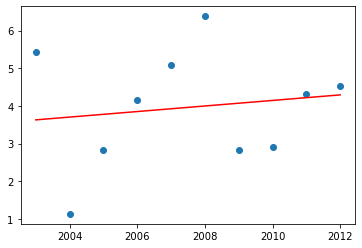

In [298]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [299]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.02092978686078595

In [300]:
all_act_2012_res_p18_24_slope = model.coef_
all_act_2012_res_p18_24_slope

array([[0.07368851]])

#### 2003-2019 Regression

In [301]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_p18_24_hpd, atus_2004_unsp_p18_24_hpd, atus_2005_unsp_p18_24_hpd,
                                   atus_2006_unsp_p18_24_hpd, atus_2007_unsp_p18_24_hpd, atus_2008_unsp_p18_24_hpd,
                                   atus_2009_unsp_p18_24_hpd, atus_2010_unsp_p18_24_hpd, atus_2011_unsp_p18_24_hpd,
                                   atus_2012_unsp_p18_24_hpd, atus_2013_unsp_p18_24_hpd, atus_2014_unsp_p18_24_hpd,
                                   atus_2015_unsp_p18_24_hpd, atus_2016_unsp_p18_24_hpd, atus_2017_unsp_p18_24_hpd,
                                   atus_2018_unsp_p18_24_hpd, atus_2019_unsp_p18_24_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

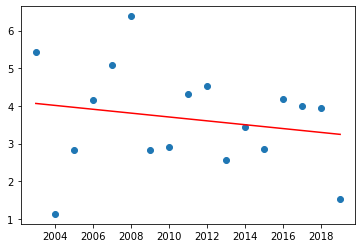

In [302]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [303]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.03678014404677865

In [304]:
all_act_2019_res_p18_24_slope = model.coef_
all_act_2019_res_p18_24_slope

array([[-0.0513055]])